## Experimenting with Adult dataset

The goal of this task is to understand better how the parameter values affect the performance of Decision Trees. We will do this on the dataset `adult.data.csv` (a.k.a. "Census Income" dataset) originating from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/adult). 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (10.0, 8.0)
 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
 
%load_ext autoreload
%autoreload 2

In [3]:
np.random.seed(0)
data = pd.read_csv("data/raw/adult.data.csv", dtype="category", header = None, index_col = None, na_values=["NA", " ?", ""])
data.columns = ["age", "workclass", "not_needed1", "education1", "education", "marital_status","occupation",
                "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "country", "income"]

data.dropna(inplace = True)

data["age"] = pd.to_numeric(data["age"])
data["education"] = pd.to_numeric(data["education"])
data["capital_gain"] = pd.to_numeric(data["capital_gain"])
data["capital_loss"] = pd.to_numeric(data["capital_loss"])
data["hours_per_week"] = pd.to_numeric(data["hours_per_week"])
data["capital_gain"] = data["capital_gain"] - data["capital_loss"]
data["income"] = data.income.str.strip()

data.drop(["not_needed1", "education1", "relationship", "capital_gain", "capital_loss", "country"], axis = 1, inplace = True)

a = data[data.income == ">50K"].index
b = data[data.income == "<=50K"].index
b = np.random.choice(b, size = len(a), replace = False)
data = data.loc[np.concatenate([a, b])]

In [4]:
data.head()

age          workclass  education       marital_status        occupation  \
7    52   Self-emp-not-inc          9   Married-civ-spouse   Exec-managerial   
8    31            Private         14        Never-married    Prof-specialty   
9    42            Private         13   Married-civ-spouse   Exec-managerial   
10   37            Private         10   Married-civ-spouse   Exec-managerial   
11   30          State-gov         13   Married-civ-spouse    Prof-specialty   

                   race      sex  hours_per_week income  
7                 White     Male              45   >50K  
8                 White   Female              50   >50K  
9                 White     Male              40   >50K  
10                Black     Male              80   >50K  
11   Asian-Pac-Islander     Male              40   >50K

In [5]:
data.income.value_counts()

income
>50K     7508
<=50K    7508
Name: count, dtype: int64

In [6]:
# 1-hot encoding
data = pd.get_dummies(data, columns = ["workclass", "marital_status", "occupation", "race", "sex"], drop_first=True)
data.head()

age  education  hours_per_week income  workclass_ Local-gov  \
7    52          9              45   >50K                 False   
8    31         14              50   >50K                 False   
9    42         13              40   >50K                 False   
10   37         10              80   >50K                 False   
11   30         13              40   >50K                 False   

    workclass_ Never-worked  workclass_ Private  workclass_ Self-emp-inc  \
7                     False               False                    False   
8                     False                True                    False   
9                     False                True                    False   
10                    False                True                    False   
11                    False               False                    False   

    workclass_ Self-emp-not-inc  workclass_ State-gov  ...  \
7                          True                 False  ...   
8                         False                 False  ...   
9                         False                 False  ...   
10                        False                 False  ...   
11                        False                  True  ...   

    occupation_ Prof-specialty  occupation_ Protective-serv  \
7                        False                        False   
8                         True                        False   
9                        False                        False   
10                       False                        False   
11                        True                        False   

    occupation_ Sales  occupation_ Tech-support  occupation_ Transport-moving  \
7               False                     False                         False   
8               False                     False                         False   
9               False                     False                         False   
10              False                     False                         False   
11              False                     False                         False   

    race_ Asian-Pac-Islander  race_ Black  race_ Other  race_ White  sex_ Male  
7                      False        False        False         True       True  
8                      False        False        False         True      False  
9                      False        False        False         True       True  
10                     False         True        False        False       True  
11                      True        False        False        False       True  

[5 rows x 35 columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(["income"], axis = 1), data["income"],
                                                    test_size = 0.5, random_state = 0)

In [8]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train,y_train)
print("Train Accuracy :", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy : 0.7559936068193926
Test Accuracy : 0.7566595631326585


* The train accuracy should be about $75.5\%$,
* The test accuracy should be about $75.6\%$,
Obviously, this is a good result because the accuracy obtained on the test data is higher than the accuracy obtained on the training data => no overfitting or similar problems occurred during model training.

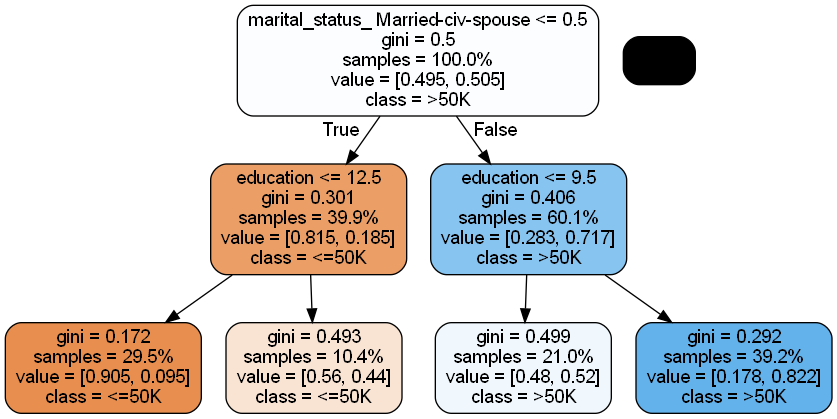

In [9]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns,  
                          class_names=["<=50K", ">50K"], filled=True, rounded=True, 
                           proportion=True, special_characters=False) 

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

Now let's try with the default hyperparameters (i.e. no parameters in DecisionTreeClassifier() ctor).

In [10]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("Train Accuracy :",accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :",accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy : 0.9790889717634523
Test Accuracy : 0.7360149174214171


* The train accuracy should be about $97\%$,
* The test accuracy should be about $73\%$,
Obviously, this is a bad result because the accuracy obtained on the test data is lower than the accuracy obtained on the training data => there was an overfitting during model training.

In [11]:
dot_data = export_graphviz(dt, out_file=None, feature_names=X_train.columns,  
                          class_names=["<=50K", ">50K"], filled=True, rounded=True, 
                           proportion=True, special_characters=False) 

graph = pydotplus.graph_from_dot_data(dot_data)  

Image(graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.390469 to fit


In [12]:
from sklearn.model_selection import GridSearchCV
parameters = dict(criterion = ("gini", "entropy"), 
                  max_depth = np.arange(1, 10),
                  min_samples_split = np.arange(2,10))

model = DecisionTreeClassifier()
# GridSearchCV tests different combinations of its parameters values and returns a table of that combinations with obtained results
clf = GridSearchCV(model, parameters, scoring='accuracy', cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
             scoring='accuracy')

In [13]:
pd.DataFrame(clf.cv_results_)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.029544      0.008961         0.007158        0.002952   
1         0.024116      0.010427         0.008855        0.002009   
2         0.022160      0.009246         0.008154        0.010189   
3         0.009857      0.001011         0.006665        0.003745   
4         0.010376      0.001746         0.003591        0.001341   
..             ...           ...              ...             ...   
139       0.023541      0.000545         0.004378        0.000503   
140       0.027257      0.003543         0.003722        0.002097   
141       0.024211      0.001040         0.004287        0.000568   
142       0.024527      0.000836         0.003987        0.000618   
143       0.024960      0.002090         0.004639        0.001176   

    param_criterion param_max_depth param_min_samples_split  \
0              gini               1                       2   
1              gini               1                       3   
2              gini               1                       4   
3              gini               1                       5   
4              gini               1                       6   
..              ...             ...                     ...   
139         entropy               9                       5   
140         entropy               9                       6   
141         entropy               9                       7   
142         entropy               9                       8   
143         entropy               9                       9   

                                                params  split0_test_score  \
0    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.754328   
1    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.754328   
2    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.754328   
3    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.754328   
4    {'criterion': 'gini', 'max_depth': 1, 'min_sam...           0.754328   
..                                                 ...                ...   
139  {'criterion': 'entropy', 'max_depth': 9, 'min_...           0.800266   
140  {'criterion': 'entropy', 'max_depth': 9, 'min_...           0.800932   
141  {'criterion': 'entropy', 'max_depth': 9, 'min_...           0.802929   
142  {'criterion': 'entropy', 'max_depth': 9, 'min_...           0.802264   
143  {'criterion': 'entropy', 'max_depth': 9, 'min_...           0.800932   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.748336           0.752996           0.756829   
1             0.748336           0.752996           0.756829   
2             0.748336           0.752996           0.756829   
3             0.748336           0.752996           0.756829   
4             0.748336           0.752996           0.756829   
..                 ...                ...                ...   
139           0.779627           0.784953           0.798801   
140           0.780293           0.784288           0.797468   
141           0.782290           0.784288           0.800133   
142           0.784953           0.785619           0.801466   
143           0.778296           0.784953           0.798801   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.767488         0.755995        0.006375              113  
1             0.767488         0.755995        0.006375              113  
2             0.767488         0.755995        0.006375              113  
3             0.767488         0.755995        0.006375              113  
4             0.767488         0.755995        0.006375              113  
..                 ...              ...             ...              ...  
139           0.794137         0.791557        0.008011               78  
140           0.794137         0.791424        0.007863               79  
141           0.794803         0.792889        0.0

In [14]:
# The combination of parameters values that gave the best result
clf.best_params_

{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3}

In [15]:
clf.fit(X_train, y_train)
print("Train Accuracy :", accuracy_score(y_train, clf.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, clf.predict(X_test)))

Train Accuracy : 0.8120671283963772
Test Accuracy : 0.8000799147575919


* The train accuracy should be about $81\%$,
* The test accuracy should be about $80\%$,
Obviously, this is a good result because the accuracy obtained on the test data is approximately equal to the accuracy obtained on the training data => no overfitting or similar problems occurred during model training.

In [16]:
# Another way is to take the best hyperparameter combination and create a new model.
dt = DecisionTreeClassifier()
dt.set_params(**clf.best_params_)
dt.fit(X_train, y_train)
print("Train Accuracy :", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy : 0.8120671283963772
Test Accuracy : 0.8000799147575919


We can see the most important features that help to predict the classes by using the `feature_importances_` attribute, which basically takes into account the amount of information gain that was achieved by each feature. See [this](https://stackoverflow.com/questions/49170296/scikit-learn-feature-importance-calculation-in-decision-trees) for more details.

In [17]:
df = pd.DataFrame(dt.feature_importances_, X_train.columns, columns=["importances"])
df[df.importances > 0].sort_values(by="importances", ascending=False)

importances
marital_status_ Married-civ-spouse     0.592953
education                              0.252996
age                                    0.090283
hours_per_week                         0.044622
occupation_ Other-service              0.007334
occupation_ Prof-specialty             0.004850
sex_ Male                              0.003793
workclass_ Self-emp-inc                0.001279
marital_status_ Married-AF-spouse      0.001073
workclass_ Private                     0.000506
workclass_ Self-emp-not-inc            0.000312

In [18]:
# It is possible to create a model based on features with importance higher than threshold
threshold = 0.01
X_train2 = X_train[df.index[df.importances > threshold]]
X_test2 = X_test[df.index[df.importances > threshold]]

dt = DecisionTreeClassifier()
dt.set_params(**clf.best_params_)
dt.fit(X_train2, y_train)
print("Train Accuracy :", accuracy_score(y_train, dt.predict(X_train2)))
print("Test Accuracy :", accuracy_score(y_test, dt.predict(X_test2)))

Train Accuracy : 0.810335641981886
Test Accuracy : 0.8015450186467767
